## Running PERMANOVA Test

In [26]:
import sys
from importlib import reload
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, normalize
from scipy.spatial.distance import pdist, squareform
from skbio.stats.distance import permanova, DistanceMatrix
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from skbio.stats.distance import permdisp
from pyclustertend.hopkins import hopkins
from sklearn.cluster import KMeans
from scipy.spatial import ConvexHull
import matplotlib.patches as mpatches
from sklearn.metrics import silhouette_score
from scipy.stats import spearmanr


sys.path.append("../file_loader")
sys.path.append("../preprocessing-block")
sys.path.append("../features_calculation")
sys.path.append("../statistical_tests")


import ecg_file_loader
from ecg_file_loader import ECGFileLoader

import rpeaks_finder
from rpeaks_finder import *

import ectopic_beats_filtering
from ectopic_beats_filtering import *

import time_features
from time_features import *

import frequency_features
from frequency_features import *

import nonlinear_features
from nonlinear_features import *


reload(ecg_file_loader)
reload(rpeaks_finder)
reload(ectopic_beats_filtering)
reload(time_features)
reload(frequency_features)
reload(nonlinear_features)

<module 'nonlinear_features' from '/Users/ashleyandrea/Documents/StartUps/seizury/seizure-block-codes/statistical_tests/../features_calculation/nonlinear_features.py'>

In [48]:
giorgio = pd.read_csv("giorgio.csv")

In [49]:
giorgio.drop(columns=["tm_sdnn_index", "tm_sdann", "tm_tinn_m", "tm_tinn_n", "tm_tinn"], inplace=True)

In [50]:
pd.set_option('display.max_columns', None)

In [63]:
giorgio

,minute,tm_nni_counter,tm_nni_mean,tm_nni_min,tm_nni_max,tm_hr_mean,tm_hr_min,tm_hr_max,tm_hr_std,tm_nni_diff_mean,tm_nni_diff_min,tm_nni_diff_max,tm_sdnn,tm_rmssd,tm_sdsd,tm_nn50,tm_pnn50,tm_nn20,tm_pnn20,tm_tri_index,nl_sd1,nl_sd2,nl_sd_ratio,nl_ellipse_area,nl_sampen,nl_dfa_alpha1,nl_dfa_alpha2,total_power_x,lf_abs,lf_rel,lf_peak,hf_abs,hf_rel,hf_peak,lf_hf_ratio,fft_rel_lf,fft_rel_hf,total_power_y,vlf_abs,vlf_rel,vlf_peak,group,win_start_time_s,win_end_time_s
0,706,336.0,890.809524,781.0,957.0,67.419646,62.695925,76.824584,2.135012,18.495522,0.0,51.0,27.316378,22.073284,12.065657,1.0,0.298507,131.0,39.104478,6.857143,15.608159,35.305146,2.261967,1731.169448,1.511608,0.932583,1.253871,362.722491,74.157086,20.444579,0.042969,152.287909,41.984689,0.320312,0.486953,32.748388,67.251612,651.098298,299.117247,45.940413,0.003906,non_seizure-1,42059.734375,42360.156250
1,707,333.0,897.060060,835.0,957.0,66.923812,62.695925,71.856287,1.613273,19.481928,0.0,67.0,21.570897,23.119517,12.467346,3.0,0.903614,134.0,40.361446,6.660000,16.347363,25.624915,1.567526,1316.012444,1.431725,0.694742,1.089714,775.250440,23.588895,3.042745,0.042969,175.455594,22.632118,0.320312,0.134444,11.851067,88.148933,612.969342,325.829667,53.155948,0.003906,non_seizure-1,42120.042969,42419.839844
2,708,336.0,889.818452,753.0,957.0,67.539312,62.695925,79.681275,2.843289,19.414925,0.0,67.0,34.566221,22.971624,12.296648,2.0,0.597015,137.0,40.895522,6.588235,16.243391,46.043214,2.834581,2349.590660,1.350824,0.943372,1.031569,618.200569,44.257135,7.159025,0.042969,164.972573,26.685930,0.316406,0.268270,21.152415,78.847585,581.629531,341.179371,58.659224,0.015625,non_seizure-1,42180.367188,42480.425781
3,709,336.0,890.675595,753.0,957.0,67.479545,62.695925,79.681275,2.903835,20.286567,0.0,67.0,35.461210,24.085916,13.003511,7.0,2.089552,144.0,42.985075,7.466667,17.030347,47.047207,2.762551,2517.139111,1.361046,1.200076,1.330958,1269.152081,91.979614,7.247328,0.058594,154.990699,12.212146,0.316406,0.593452,37.243186,62.756814,732.370713,480.279445,65.578734,0.007812,non_seizure-1,42239.796875,42540.156250
4,710,336.0,890.797619,753.0,992.0,67.481017,60.483871,79.681275,3.020534,21.364179,0.0,71.0,37.285275,25.372273,13.707113,11.0,3.283582,156.0,46.567164,8.615385,17.940900,49.539527,2.761262,2792.196376,1.626606,0.787498,1.396896,1612.180310,226.523104,14.050730,0.058594,135.918582,8.430731,0.332031,1.666609,62.499186,37.500814,761.558382,497.107693,65.275060,0.007812,non_seizure-1,42299.613281,42600.019531
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,962,365.0,819.778082,746.0,906.0,73.343881,66.225166,80.428954,3.372623,14.467033,0.0,51.0,37.415510,18.263487,11.162536,1.0,0.274725,85.0,23.351648,10.138889,12.913809,51.271088,3.970253,2080.064373,1.240221,1.062088,1.427240,998.236632,59.014899,5.911915,0.078125,131.699699,13.193234,0.300781,0.448102,30.944091,69.055909,948.079482,779.625418,82.232074,0.011719,pre_seizure,57419.464844,57719.640625
269,963,363.0,822.661157,746.0,906.0,73.096304,66.225166,80.428954,3.471957,14.723757,0.0,51.0,38.594339,18.738532,11.606710,1.0,0.276243,90.0,24.861878,10.083333,13.249723,52.898594,3.992430,2201.916336,1.184652,0.932594,1.533663,1524.815221,106.918513,7.011900,0.046875,109.063100,7.152545,0.300781,0.980336,49.503526,50.496474,1161.407235,981.641498,84.521731,0.011719,pre_seizure,57480.039062,57779.667969
270,964,363.0,822.809917,746.0,906.0,73.091554,66.225166,80.428954,3.557695,14.668508,0.0,51.0,39.630820,18.814154,11.797955,1.0,0.276243,92.0,25.414365,10.676471,13.302913,54.376486,4.087562,2272.520243,1.207686,1.155222,1.502606,1392.142883,90.578099,6.506380,0.058594,107.698142,7.736141,0.300781,0.841037,45.682780,54.317220,1171.791546,984.852055,84.046694,0.011719,pre_seizure,57540.171875,57839.878906
271,965,368.0,813.595109,742.0,906.0,73.910614,66.225166,80.862534,3.490280,13.7

In [64]:
# Create detrended dataset
giorgio_detrended = giorgio.copy()

In [65]:
# Get feature columns (exclude non-feature columns)
feature_cols = [c for c in giorgio.columns if c not in ['group', 'win_start_time_s', 'win_end_time_s', 'minute']]

In [66]:
# Detrend: subtract column mean from each feature
for col in feature_cols:
    col_mean = giorgio[col].mean()
    giorgio_detrended[col] = giorgio[col] - col_mean

In [67]:
print("Original dataset shape:", giorgio.shape)
print("Detrended dataset shape:", giorgio_detrended.shape)
print("\nVerification - Feature means after detrending (should be ~0):")
print(giorgio_detrended[feature_cols].mean().head(10))

Original dataset shape: (273, 44)
Detrended dataset shape: (273, 44)

Verification - Feature means after detrending (should be ~0):
tm_nni_counter     -1.249306e-14
tm_nni_mean         1.749028e-14
tm_nni_min         -4.164353e-14
tm_nni_max          2.498612e-14
tm_hr_mean          4.268462e-15
tm_hr_min           2.758884e-15
tm_hr_max           6.454747e-15
tm_hr_std           0.000000e+00
tm_nni_diff_mean    0.000000e+00
tm_nni_diff_min     0.000000e+00
dtype: float64


#### Rescaling features to contribute equally to the distance

In [68]:
scaler = StandardScaler()

X = giorgio_detrended.drop(columns=['group', 'win_start_time_s', 'win_end_time_s', 'minute']).values
X_scaled = scaler.fit_transform(X)  
N = X_scaled.shape[0]
n_groups = giorgio_detrended['group'].nunique()

print(f"Number of samples: {N}")
print(f"Number of groups: {n_groups}")

Number of samples: 273
Number of groups: 13


In [69]:
X.shape

(273, 40)

#### Computing distance matrix and running PERMANOVA globally

Using different distance types to ensure robustness.

Results should be displayed in the form: 
```
method name               PERMANOVA
test statistic name        pseudo-F
sample size                 40
number of groups            2
test statistic              4.23
p-value                     0.001
number of permutations      999
Name: PERMANOVA results, dtype: object
```

How do permutations influence significance (p-value)? 
If **p < 0.05**, that means the observed separation between groups (pre-seizure vs. non-seizure) is unlikely to have occurred by chance under the null hypothesis (that all samples come from the same population). **There is a statistically significant multivariate difference between the groups.**

Also, **pseudo-F value**: ratio of between-group variance to within-group variance. **Higher pseudo-F ⇒ greater separation between group centroids** relative to internal spread. Not universal value, to interpret relative to different feature sets.

**R²** expresses the fraction of total variance explained by group differences (e.g. R² = 0.25 → group membership explains 25 % of overall variation). **We want a high R²**.

PERMANOVA assumes the two groups differ in centroid, not just spread. If one group is simply more variable, it can inflate pseudo-F and yield a small p-value -> PERMDISP (homogeneity of dispersion test):

- **Non-significant dispersion test (p > 0.05)** → differences likely due to centroid shift (true effect).
- **Significant dispersion test (p < 0.05)** → groups might just differ in variability.

In [14]:
for metric in ["euclidean", "cityblock", "cosine", "mahalanobis"]:
    try:
        if metric == "cityblock":
            # cityblock is the correct name for Manhattan distance
            dist_matrix = squareform(pdist(X_scaled, metric='cityblock'))
        elif metric == "mahalanobis":
            # Mahalanobis needs covariance matrix
            cov = np.cov(X_scaled, rowvar=False)
            eps = 1e-8
            cov_reg = cov + np.eye(cov.shape[0]) * eps
            try:
                VI = np.linalg.inv(cov_reg)
            except np.linalg.LinAlgError:
                VI = np.linalg.pinv(cov_reg)
            dist_matrix = squareform(pdist(X_scaled, metric='mahalanobis', VI=VI))
        elif metric == "cosine":
            X_norm = normalize(X_scaled, norm='l2')
            dist_matrix = squareform(pdist(X_norm, metric='cosine'))
        else:
            dist_matrix = squareform(pdist(X_scaled, metric=metric))
        
        # Create simple sequential IDs that match the number of rows
        sample_ids = [str(i) for i in range(len(X_scaled))]
        dm = DistanceMatrix(dist_matrix, ids=sample_ids)
        
        # Extract group labels as a LIST (not pandas Series)
        group_labels = giorgio['group'].tolist()
        
        # Run PERMANOVA with the group list
        result = permanova(dm, group_labels, permutations=999)
        
        # Calculate R²
        df_between = n_groups - 1
        df_within = N - n_groups
        pseudo_F = result['test statistic']
        R2 = (pseudo_F * df_between) / (pseudo_F * df_between + df_within)
        
        # Run PERMDISP
        disp_result = permdisp(dm, group_labels, permutations=999)
        
        print(f"=== Metric: {metric} ===")
        print(f"  pseudo-F: {result['test statistic']:.4f}")
        print(f"  p-value: {result['p-value']:.4f}")
        print(f"  R²: {R2:.4f}")
        print(f"  PERMDISP p-value: {disp_result['p-value']:.4f}")
        print()
        
    except Exception as e:
        print(f"Metric {metric} failed: {e}")
        import traceback
        traceback.print_exc()
        print()

=== Metric: euclidean ===
  pseudo-F: 16.2329
  p-value: 0.0010
  R²: 0.3629
  PERMDISP p-value: 0.0190

=== Metric: cityblock ===
  pseudo-F: 17.1487
  p-value: 0.0010
  R²: 0.3757
  PERMDISP p-value: 0.0090

=== Metric: cosine ===
  pseudo-F: 26.6545
  p-value: 0.0010
  R²: 0.4833
  PERMDISP p-value: 0.1700

=== Metric: mahalanobis ===
  pseudo-F: 2.3254
  p-value: 0.0010
  R²: 0.0754
  PERMDISP p-value: 0.0010



In [78]:
# Filter for only the first two non-seizure consecutive windows
first_two_groups = giorgio['group'].unique()[10:12]  # Get last two non-seizure groups in order
giorgio_first_two = giorgio[giorgio['group'].isin(first_two_groups)].copy()

print(f"Selected groups: {list(first_two_groups)}")
print(f"Number of samples: {len(giorgio_first_two)}")

# Extract features and scale
X_first_two = giorgio_first_two.drop(columns=['group', 'win_start_time_s', 'win_end_time_s', 'minute']).values
scaler_first_two = StandardScaler()
X_scaled_first_two = scaler_first_two.fit_transform(X_first_two)
N_first_two = X_scaled_first_two.shape[0]
n_groups_first_two = giorgio_first_two['group'].nunique()

# Run PERMANOVA on first two groups only
for metric in ["euclidean", "cityblock", "cosine", "mahalanobis"]:
    try:
        if metric == "cityblock":
            dist_matrix = squareform(pdist(X_scaled_first_two, metric='cityblock'))
        elif metric == "mahalanobis":
            cov = np.cov(X_scaled_first_two, rowvar=False)
            eps = 1e-8
            cov_reg = cov + np.eye(cov.shape[0]) * eps
            try:
                VI = np.linalg.inv(cov_reg)
            except np.linalg.LinAlgError:
                VI = np.linalg.pinv(cov_reg)
            dist_matrix = squareform(pdist(X_scaled_first_two, metric='mahalanobis', VI=VI))
        elif metric == "cosine":
            X_norm = normalize(X_scaled_first_two, norm='l2')
            dist_matrix = squareform(pdist(X_norm, metric='cosine'))
        else:
            dist_matrix = squareform(pdist(X_scaled_first_two, metric=metric))
        
        sample_ids = [str(i) for i in range(len(X_scaled_first_two))]
        dm = DistanceMatrix(dist_matrix, ids=sample_ids)
        
        group_labels = giorgio_first_two['group'].tolist()
        
        result = permanova(dm, group_labels, permutations=999)
        
        # Calculate R²
        df_between = n_groups_first_two - 1
        df_within = N_first_two - n_groups_first_two
        pseudo_F = result['test statistic']
        R2 = (pseudo_F * df_between) / (pseudo_F * df_between + df_within)
        
        # Run PERMDISP
        disp_result = permdisp(dm, group_labels, permutations=999)
        
        print(f"=== Metric: {metric} (First Two Non-Seizure Windows) ===")
        print(f"  pseudo-F: {result['test statistic']:.4f}")
        print(f"  p-value: {result['p-value']:.4f}")
        print(f"  R²: {R2:.4f}")
        print(f"  PERMDISP p-value: {disp_result['p-value']:.4f}")
        print()
        
    except Exception as e:
        print(f"Metric {metric} failed: {e}")
        import traceback
        traceback.print_exc()
        print()

Selected groups: ['non_seizure-11', 'non_seizure-12']
Number of samples: 42
=== Metric: euclidean (First Two Non-Seizure Windows) ===
  pseudo-F: 5.9754
  p-value: 0.0010
  R²: 0.1300
  PERMDISP p-value: 0.0020

=== Metric: cityblock (First Two Non-Seizure Windows) ===
  pseudo-F: 7.7414
  p-value: 0.0010
  R²: 0.1622
  PERMDISP p-value: 0.0010

=== Metric: cosine (First Two Non-Seizure Windows) ===
  pseudo-F: 8.2684
  p-value: 0.0010
  R²: 0.1713
  PERMDISP p-value: 0.0020

=== Metric: mahalanobis (First Two Non-Seizure Windows) ===
  pseudo-F: 1.0638
  p-value: 0.1960
  R²: 0.0259
  PERMDISP p-value: 0.0510



#### PCA for visual group separation

Explained variance ratio (PC1, PC2, PC3, PC4, PC5, PC6, PC7, PC8, PC9, PC10, PC11, PC12, PC13, PC14, PC15, PC16, PC17, PC18, PC19, PC20, PC21, PC22, PC23, PC24, PC25, PC26, PC27, PC28, PC29, PC30, PC31, PC32, PC33, PC34, PC35, PC36, PC37, PC38, PC39, PC40): [3.33275190e-01 2.63596208e-01 1.04258167e-01 6.27252223e-02
 3.86603673e-02 3.26168335e-02 2.59215519e-02 2.45243450e-02
 2.01246635e-02 1.83007607e-02 1.38812080e-02 1.14432633e-02
 9.06370777e-03 8.01706429e-03 6.34202091e-03 5.91744129e-03
 4.82749193e-03 3.34929069e-03 3.17860318e-03 2.14743520e-03
 1.89863540e-03 1.78563461e-03 1.29333492e-03 1.11037313e-03
 9.19875249e-04 3.00770559e-04 2.59326320e-04 1.15588953e-04
 4.80512104e-05 3.65438905e-05 2.76117478e-05 1.51509062e-05
 8.79551947e-06 5.55573240e-06 2.78014415e-06 7.61728480e-07
 3.73945704e-07 4.25890137e-11 2.45543935e-33 2.45543935e-33]


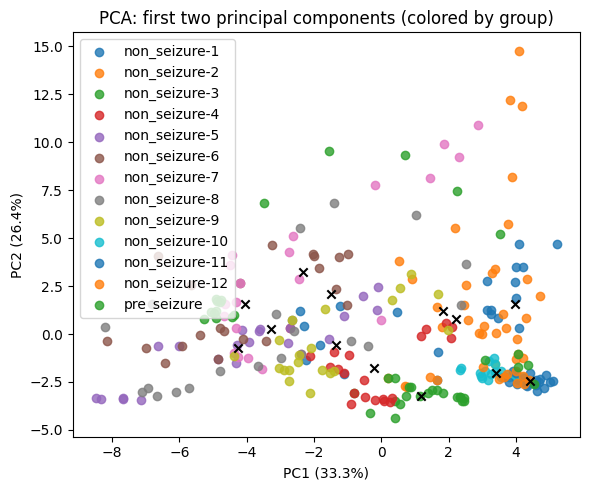

Total explained variance by first 40 PCs: 1.0


In [71]:
pca = PCA(n_components=40)
pcs = pca.fit_transform(X_scaled)

print("Explained variance ratio (PC1, PC2, PC3, PC4, PC5, PC6, PC7, PC8, PC9, PC10, PC11, PC12, PC13, PC14, PC15, PC16, PC17, PC18, PC19, PC20, PC21, PC22, PC23, PC24, PC25, PC26, PC27, PC28, PC29, PC30, PC31, PC32, PC33, PC34, PC35, PC36, PC37, PC38, PC39, PC40):", pca.explained_variance_ratio_)

# scatter colored by group
groups = giorgio_detrended['group'].values
unique_groups = pd.unique(groups)
colors = dict(zip(unique_groups, ['C0','C1','C2','C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21', 'C22', 'C23', 'C24', 'C25', 'C26', 'C27', 'C28', 'C29', 'C30', 'C31', 'C32', 'C33', 'C34', 'C35', 'C36', 'C37', 'C38', 'C39', 'C40'][:len(unique_groups)]))

plt.figure(figsize=(6,5))
for g in unique_groups:
    mask = groups == g
    plt.scatter(pcs[mask,0], pcs[mask,1], label=g, color=colors[g], alpha=0.8)
# optional: plot centroids 
for g in unique_groups:
    mask = groups == g
    cx, cy = pcs[mask,0].mean(), pcs[mask,1].mean()
    plt.scatter(cx, cy, marker='x', color='k')
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)")
plt.legend()
plt.title("PCA: first two principal components (colored by group)")
plt.tight_layout()
plt.show()

print("Total explained variance by first 40 PCs:", np.sum(pca.explained_variance_ratio_))

Explained variance ratio (PC1, PC2, PC3, PC4, PC5, PC6, PC7, PC8, PC9, PC10, PC11, PC12, PC13, PC14, PC15, PC16, PC17, PC18, PC19, PC20, PC21, PC22, PC23, PC24, PC25, PC26, PC27, PC28, PC29, PC30, PC31, PC32, PC33, PC34, PC35, PC36, PC37, PC38, PC39, PC40): [3.33275190e-01 2.63596208e-01 1.04258167e-01 6.27252223e-02
 3.86603673e-02 3.26168335e-02 2.59215519e-02 2.45243450e-02
 2.01246635e-02 1.83007607e-02 1.38812080e-02 1.14432633e-02
 9.06370777e-03 8.01706429e-03 6.34202091e-03 5.91744129e-03
 4.82749193e-03 3.34929069e-03 3.17860318e-03 2.14743520e-03
 1.89863540e-03 1.78563461e-03 1.29333492e-03 1.11037313e-03
 9.19875249e-04 3.00770559e-04 2.59326320e-04 1.15588953e-04
 4.80512104e-05 3.65438905e-05 2.76117478e-05 1.51509062e-05
 8.79551947e-06 5.55573240e-06 2.78014415e-06 7.61728480e-07
 3.73945704e-07 4.25890137e-11 2.45543935e-33 2.45543935e-33]


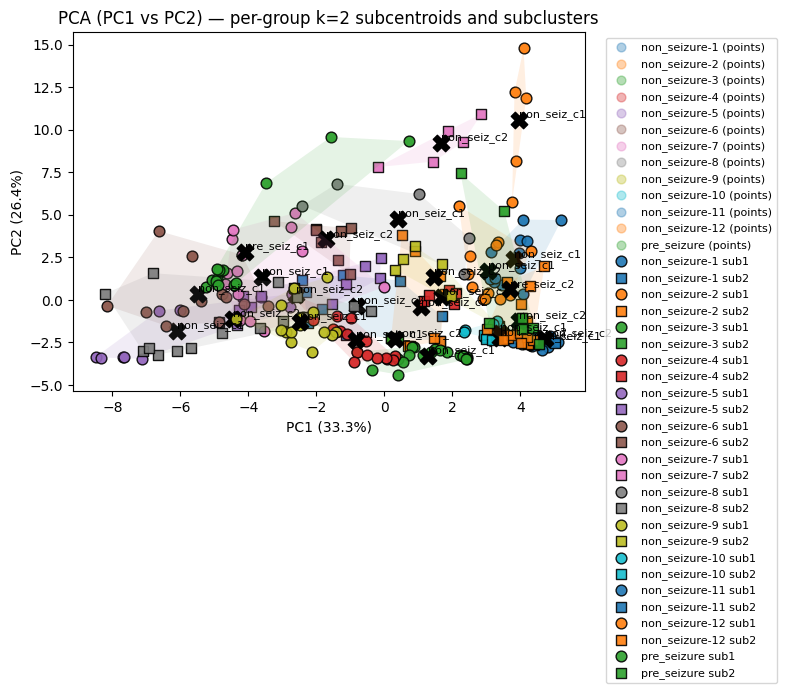

In [72]:
# ensure PCs present 
pca = PCA(n_components=40)
pcs = pca.fit_transform(X_scaled)  

print("Explained variance ratio (PC1, PC2, PC3, PC4, PC5, PC6, PC7, PC8, PC9, PC10, PC11, PC12, PC13, PC14, PC15, PC16, PC17, PC18, PC19, PC20, PC21, PC22, PC23, PC24, PC25, PC26, PC27, PC28, PC29, PC30, PC31, PC32, PC33, PC34, PC35, PC36, PC37, PC38, PC39, PC40):", pca.explained_variance_ratio_)

pc_df = pd.DataFrame(pcs, columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18','PC19','PC20','PC21','PC22','PC23','PC24','PC25','PC26','PC27','PC28','PC29','PC30','PC31','PC32','PC33','PC34','PC35','PC36','PC37','PC38','PC39','PC40'], index=giorgio_detrended.index)

groups = giorgio_detrended['group'].values
unique_groups = pd.unique(groups)
group_colors = dict(zip(unique_groups, ['C0','C1','C2','C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21', 'C22', 'C23', 'C24', 'C25', 'C26', 'C27', 'C28', 'C29', 'C30', 'C31', 'C32', 'C33', 'C34', 'C35', 'C36', 'C37', 'C38', 'C39', 'C40'][:len(unique_groups)]))

plt.figure(figsize=(8,6))

# plot all points faintly by group
for g in unique_groups:
    mask = groups == g
    plt.scatter(pc_df.loc[mask, 'PC1'], pc_df.loc[mask, 'PC2'],
                s=40, color=group_colors[g], alpha=0.35, label=f"{g} (points)")

# per-group KMeans with k=2, plot subclusters and centroids
k = 2
centroid_patches = []
for g in unique_groups:
    idx = giorgio_detrended.index[giorgio_detrended['group'] == g]
    Xg = pc_df.loc[idx].values
    n = Xg.shape[0]
    if n < k:
        continue
    km = KMeans(n_clusters=k, random_state=0, n_init=10).fit(Xg)
    labels = km.labels_
    centers = km.cluster_centers_
    # plot subcluster points with darker edge
    markers = ['o', 's', 'D', '^', 'v']
    for ci in range(k):
        mask_ci = (labels == ci)
        pts = Xg[mask_ci]
        if pts.size == 0:
            continue
        plt.scatter(pts[:,0], pts[:,1],
                    s=60, facecolor=group_colors[g], edgecolor='k',
                    marker=markers[ci % len(markers)], alpha=0.9,
                    label=f"{g} sub{ci+1}")
        # convex hull to visualize compactness (if enough points)
        if pts.shape[0] >= 3:
            try:
                hull = ConvexHull(pts[:, :2])  # only use first 2 dims for hull
                hull_pts = pts[hull.vertices, :2]
                poly = mpatches.Polygon(hull_pts, closed=True,
                                       facecolor=group_colors[g], alpha=0.12, edgecolor=None)
                plt.gca().add_patch(poly)
            except Exception:
                pass
        # plot centroid (only PC1, PC2)
        cx, cy = centers[ci, 0], centers[ci, 1]
        plt.scatter(cx, cy, marker='X', s=140, color='k')
        plt.text(cx, cy, f"{g[:8]}_c{ci+1}", fontsize=8, ha='left', va='bottom')

# tidy legend: keep unique labels
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(1.03,1), loc='upper left', fontsize=8)
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)")
plt.title("PCA (PC1 vs PC2) — per-group k=2 subcentroids and subclusters")
plt.tight_layout()
plt.show()

In [73]:
def within_subgroup_variance_ratio(df, feature_cols=None, group_col='group',
                                   k=2, use_pca=False, n_components=40, scaler=None):
    """
    For each group in df:
      - optionally project features to PCA space (fit on full dataset)
      - cluster group's points into k subgroups (KMeans)
      - compute total group variance = trace(covariance of group's points)
      - compute sum of subgroup variances = sum trace(covariance of each subgroup)
      - return ratio = sum_subgroup_var / total_group_var

    Returns: pd.DataFrame with columns:
      ['group','n','total_var','sum_within_var','ratio']
    """

    if feature_cols is None:
        feature_cols = [c for c in df.columns if c not in (group_col, 'window_center_s')]

    X_all = df[feature_cols].values
    if scaler is None:
        scaler = StandardScaler().fit(X_all)
    X_scaled_all = scaler.transform(X_all)

    if use_pca:
        pca = PCA(n_components=min(n_components, X_scaled_all.shape[1])).fit(X_scaled_all)
        X_proj = pca.transform(X_scaled_all)
    else:
        X_proj = X_scaled_all

    score_df = pd.DataFrame(X_proj, index=df.index)

    out = []
    for grp, g in df.groupby(group_col):
        idx = g.index
        Xg = score_df.loc[idx].values
        n = Xg.shape[0]
        if n < 2:
            out.append({'group': grp, 'n': n, 'total_var': np.nan,
                        'sum_within_var': np.nan, 'ratio': np.nan})
            continue

        # total variance (trace of covariance). use bias=True for population variance
        cov_g = np.cov(Xg.T, bias=True)
        total_var = np.trace(cov_g)

        # choose cluster count not greater than n
        k_eff = min(k, n)
        if k_eff == 1:
            sum_within = 0.0
        else:
            km = KMeans(n_clusters=k_eff, random_state=0, n_init=10).fit(Xg)
            labels = km.labels_
            sum_within = 0.0
            for ci in range(k_eff):
                pts = Xg[labels == ci]
                if pts.shape[0] <= 1:
                    # zero variance for single point
                    var_ci = 0.0
                else:
                    cov_ci = np.cov(pts.T, bias=True)
                    var_ci = np.trace(cov_ci)
                sum_within += var_ci

        ratio = np.nan if (total_var == 0 or np.isnan(total_var)) else (sum_within / total_var)
        out.append({'group': grp, 'n': n, 'total_var': float(total_var),
                    'sum_within_var': float(sum_within), 'ratio': float(ratio)})

    return pd.DataFrame(out).set_index('group')

                 n  total_var  sum_within_var     ratio
group                                                  
non_seizure-1   21  22.566355       20.050223  0.888501
non_seizure-10  21   3.947543        4.900303  1.241355
non_seizure-11  21   5.201787        7.833775  1.505978
non_seizure-12  21  49.768605       55.810748  1.121405
non_seizure-2   21  18.012733       25.524498  1.417025
non_seizure-3   21   6.033900        4.992179  0.827355
non_seizure-4   21  10.227356        8.579321  0.838860
non_seizure-5   21  24.735950       29.704884  1.200879
non_seizure-6   21  24.619524       31.449625  1.277426
non_seizure-7   21  37.700768       33.698326  0.893837
non_seizure-8   21  31.430307       35.066168  1.115680
non_seizure-9   21  15.091401       18.539593  1.228487
pre_seizure     21  41.786620       46.064976  1.102386


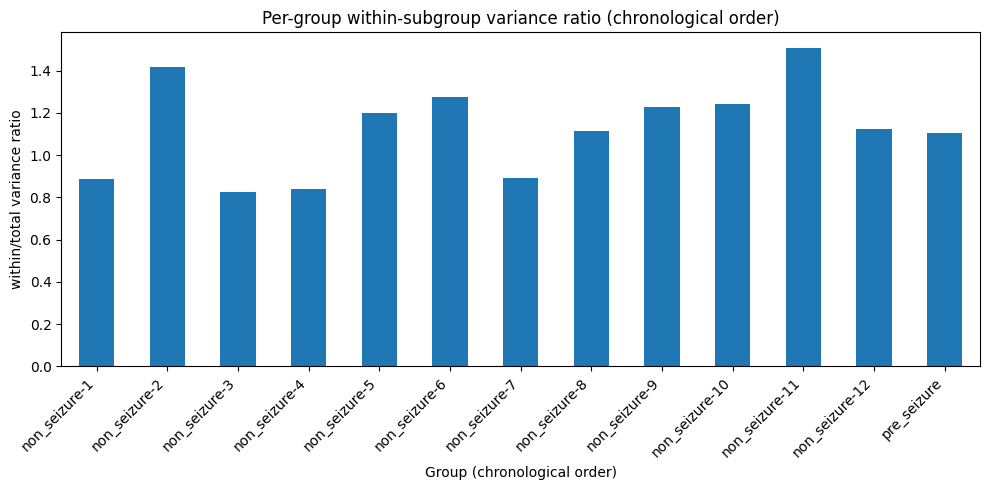

In [74]:
res = within_subgroup_variance_ratio(giorgio_detrended, k=2, use_pca=True, n_components=40)
print(res)

group_order = giorgio_detrended['group'].unique()  # preserves first-appearance order

res_ordered = res.reindex(group_order)

# Plot
res_ordered['ratio'].plot.bar(ylabel='within/total variance ratio', 
                               title='Per-group within-subgroup variance ratio (chronological order)',
                               figsize=(10, 5))
plt.xlabel('Group (chronological order)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [19]:
def extract_high_variance_subcluster(df,
                                     group_name='pre_seizure',
                                     feature_cols=None,
                                     use_pca=True,
                                     n_pca=2,
                                     k=2,
                                     random_state=0,
                                     show_plot=True,
                                     annotate=True,
                                     annotate_fontsize=8,
                                     annotate_offset=(0.02, 0.02)):
    """
    Return indices (and rows) of the subgroup inside `group_name` whose members
    contribute most to the group's variance (cluster with larger mean dist to group centroid).
    If `annotate` is True, plot the selected points with their dataframe index labels.
    """
    if feature_cols is None:
        feature_cols = [c for c in df.columns if c not in ('group', 'window_center_s')]

    X_all = df[feature_cols].values
    scaler = StandardScaler().fit(X_all)
    Xs = scaler.transform(X_all)

    if use_pca:
        pca = PCA(n_components=min(n_pca, Xs.shape[1])).fit(Xs)
        Xproj = pca.transform(Xs)
        pc_cols = [f'PC{i+1}' for i in range(Xproj.shape[1])]
        score_df = pd.DataFrame(Xproj, index=df.index, columns=pc_cols)
    else:
        score_df = pd.DataFrame(Xs, index=df.index, columns=feature_cols)
        pca = None

    # select group members
    mask = (df['group'] == group_name)
    idx = df.index[mask]
    if len(idx) < 2:
        raise ValueError(f"group '{group_name}' has too few samples: {len(idx)}")

    Xg = score_df.loc[idx].values
    centroid = Xg.mean(axis=0)
    dist_to_group = np.sum((Xg - centroid)**2, axis=1)  # per-sample contribution

    # KMeans inside group
    k_eff = min(k, len(idx))
    if k_eff == 1:
        labels = np.zeros(len(idx), dtype=int)
    else:
        km = KMeans(n_clusters=k_eff, random_state=random_state, n_init=10).fit(Xg)
        labels = km.labels_

    # find cluster whose members have larger mean dist_to_group
    cluster_means = {}
    for c in np.unique(labels):
        cluster_means[c] = dist_to_group[labels == c].mean() if (labels == c).any() else -np.inf
    high_cluster = max(cluster_means, key=cluster_means.get)

    high_idx = idx[labels == high_cluster]
    print(f"group='{group_name}', k_eff={k_eff}, selected cluster={high_cluster}, n_members={len(high_idx)}")
    print("Indices (rows) in selected subcluster:")
    print(list(high_idx))

    # show original rows
    display(df.loc[high_idx])

    # optional plot on PCA space (if available)
    if show_plot:
        fig, ax = plt.subplots(figsize=(7,5))
        if pca is not None:
            all_pts = score_df[[c for c in score_df.columns[:2]]].values
            # faint background points colored by group
            cmap_map = {g: col for g, col in zip(pd.unique(df['group']), ['C0','C1','C2','C3'])}
            bg_colors = df['group'].map(cmap_map).fillna('lightgray')
            ax.scatter(all_pts[:,0], all_pts[:,1], c=bg_colors, alpha=0.25, s=30)
            # plot members of the selected group
            gpts = score_df.loc[idx].values
            ax.scatter(gpts[:,0], gpts[:,1], s=50, facecolor='none', edgecolor='k', alpha=0.6, label=f"{group_name} (all)")
            # highlight selected high-variance members (green squares)
            sel = score_df.loc[high_idx].values
            sc = ax.scatter(sel[:,0], sel[:,1], s=140, marker='s', color='green', edgecolor='k', label=f"{group_name} high-variance (sub{high_cluster})")
            # annotate selected points with their dataframe indices if requested
            if annotate:
                # compute small offset in data coordinates
                x_span = all_pts[:,0].max() - all_pts[:,0].min()
                y_span = all_pts[:,1].max() - all_pts[:,1].min()
                dx = annotate_offset[0] * x_span
                dy = annotate_offset[1] * y_span
                for i, (x, y) in zip(high_idx, sel):
                    ax.text(x + dx, y + dy, str(i), fontsize=annotate_fontsize, color='black', weight='semibold')
            ax.set_xlabel('PC1' if 'PC1' in score_df.columns else 'dim1')
            ax.set_ylabel('PC2' if 'PC2' in score_df.columns else 'dim2')
            ax.legend()
            plt.title(f"High-variance subcluster for group='{group_name}' (cluster {high_cluster})")
            plt.tight_layout()
            plt.show()
        else:
            print("PCA not used; scatter plot skipped.")

    return list(high_idx), df.loc[high_idx]

group='pre_seizure', k_eff=2, selected cluster=1, n_members=9
Indices (rows) in selected subcluster:
[40, 41, 42, 43, 44, 45, 46, 58, 59]


,tm_nni_counter,tm_nni_mean,tm_nni_min,tm_nni_max,tm_hr_mean,tm_hr_min,tm_hr_max,tm_hr_std,tm_nni_diff_mean,tm_nni_diff_min,...,tm_tinn,tm_tri_index,nl_sd1,nl_sd2,nl_sd_ratio,nl_ellipse_area,nl_sampen,nl_dfa_alpha1,nl_dfa_alpha2,group
40,310.0,964.290323,867.0,1039.0,62.282608,57.747834,69.204152,1.956987,33.009709,0.0,...,140.6250,9.117647,27.191885,32.294298,1.187645,2758.767078,1.565428,0.631149,0.638093,pre_seizure
41,309.0,966.087379,902.0,1035.0,62.155726,57.971014,66.518847,1.759744,32.386364,0.0,...,132.8125,8.351351,26.855490,27.671287,1.030377,2334.599098,1.617513,0.349890,0.693802,pre_seizure
42,318.0,941.333333,601.0,1011.0,64.288283,59.347181,99.833611,6.745273,31.927445,0.0,...,125.0000,8.594595,32.170059,103.941208,3.230992,10504.841330,0.761733,0.627804,1.688409,pre_seizure
43,330.0,906.163636,601.0,1011.0,66.984118,59.347181,99.833611,7.689237,27.768997,0.0,...,125.0000,12.222222,29.992926,126.142625,4.205746,11885.859104,0.603608,0.811212,1.553422,pre_seizure
44,340.0,878.055882,601.0,1011.0,69.110841,59.347181,99.833611,7.575522,23.710914,0.0,...,85.9375,12.142857,27.631601,125.639938,4.546965,10906.455798,0.620481,0.971168,1.536047,pre_seizure
45,352.0,848.823864,601.0,1011.0,71.360840,59.347181,99.833611,6.960796,19.829060,0.0,...,101.5625,10.057143,25.348703,114.856294,4.531052,9146.615416,0.589328,1.040583,1.504110,pre_seizure
46,364.0,821.546703,601.0,1011.0,73.456862,59.347181,99.833611,5.543470,17.245179,0.0,...,109.3750,8.272727,23.779368,86.579937,3.640969,6467.961686,0.771784,1.201871,1.567904,pre_seizure
58,377.0,793.684350,359.0,906.0,76.365431,66.225166,167.130919,9.500060,19.039894,0.0,...,203.1250,12.161290,36.475228,89.077411,2.442134,10207.408042,0.674240,0.731169,1.340359,pre_seizure
59,383.0,779.793734,359.0,906.0,77.703740,66.225166,167.130919,9.397628,18.659686,0.0,...,210.9375,12.766667,36.769042,87.239283,2.372629,10077.302150,0.623970,0.786923,1.218589,pre_seizure


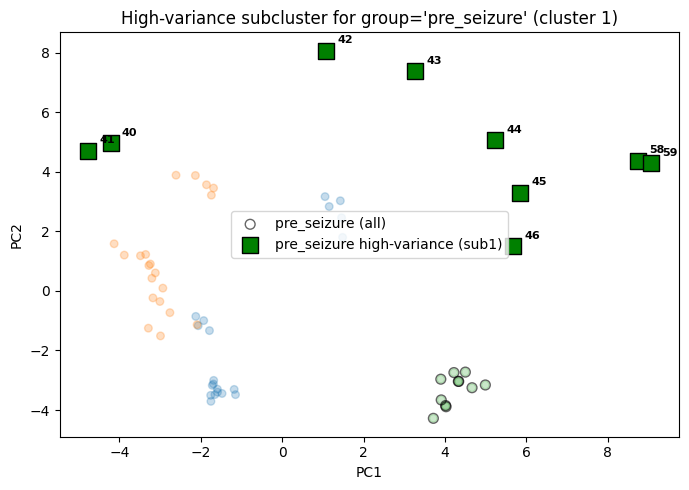

[40, 41, 42, 43, 44, 45, 46, 58, 59]


In [20]:
high_idx, high_rows = extract_high_variance_subcluster(giorgio, group_name='pre_seizure',
                                                       use_pca=True, n_pca=2, k=2,
                                                       annotate=True)
print(high_idx)

In [15]:
def map_variability_to_time(df, group_name='pre_seizure', feature_cols=None,
                            use_pca=True, n_components=2, k=2, top_n=10,
                            time_unit_minutes=1.0):
    """
    Map per-sample contribution to group variance to time.
    - If df contains 'window_center_s' it is used (converted to minutes).
    - Otherwise chronological order is inferred from row positions:
        minutes = (row_position - first_row_position_in_group) * time_unit_minutes
      (time_unit_minutes defaults to 1.0 -> one row = 1 minute; adjust if different).
    Returns: (res_df, sweep_df) like before and prints/plots diagnostics.
    """
    if feature_cols is None:
        feature_cols = [c for c in df.columns if c not in ('group', 'window_center_s')]

    X_all = df[feature_cols].values
    scaler = StandardScaler().fit(X_all)
    Xs_all = scaler.transform(X_all)

    if use_pca:
        pca = PCA(n_components=min(n_components, Xs_all.shape[1])).fit(Xs_all)
        X_proj = pca.transform(Xs_all)
        pc_cols = [f"PC{i+1}" for i in range(X_proj.shape[1])]
        score_df = pd.DataFrame(X_proj, index=df.index, columns=pc_cols)
    else:
        score_df = pd.DataFrame(Xs_all, index=df.index, columns=feature_cols)

    # select group indices in chronological order
    mask = (df['group'] == group_name)
    if mask.sum() == 0:
        raise ValueError(f"group '{group_name}' not found in df['group']")

    # determine minutes: prefer window_center_s if available
    if 'window_center_s' in df.columns:
        times_min = (df.loc[mask, 'window_center_s'].astype(float) / 60.0).values
    else:
        # positions in the full dataframe (row order)
        positions = np.flatnonzero(mask)         # indices (0..N-1) where group occurs
        times_min = (positions - positions[0]).astype(float) * float(time_unit_minutes)

    idx = df.index[mask]
    Xg = score_df.loc[idx].values
    n = Xg.shape[0]
    if n < 2:
        raise ValueError(f"group {group_name} has too few samples: {n}")

    # contribution to group variance (squared distance to group centroid)
    centroid = Xg.mean(axis=0)
    dist_group = np.sum((Xg - centroid)**2, axis=1)

    # k-means inside group
    k_eff = min(k, n)
    if k_eff == 1:
        labels = np.zeros(n, dtype=int)
        centers = centroid.reshape(1, -1)
        dist_sub = np.zeros(n)
    else:
        km = KMeans(n_clusters=k_eff, random_state=0, n_init=10).fit(Xg)
        labels = km.labels_
        centers = km.cluster_centers_
        dist_sub = np.sum((Xg - centers[labels])**2, axis=1)

    # Spearman correlation (minutes vs contribution)
    rho, pval = spearmanr(times_min, dist_group)

    res_df = pd.DataFrame({
        'index': idx,
        'minutes': times_min,
        'dist_to_group_centroid': dist_group,
        'dist_to_assigned_subcentroid': dist_sub,
        'subcluster': labels
    }, index=idx)

    top = res_df.sort_values('dist_to_group_centroid', ascending=False).head(top_n)

    print(f"Group '{group_name}': n={n}, Spearman rho (minutes vs dist_to_group_centroid) = {rho:.3f}, p = {pval:.3e}")
    print("\nTop contributors (by dist_to_group_centroid):")
    print(top[['minutes','subcluster','dist_to_group_centroid']])

    # plots
    plt.figure(figsize=(6,4))
    sc = plt.scatter(res_df['minutes'], res_df['dist_to_group_centroid'],
                     c=res_df['subcluster'], cmap='tab10', s=50, edgecolor='k', alpha=0.9)
    plt.colorbar(sc, label='subcluster')
    plt.xlabel('Minutes (relative)')
    plt.ylabel('Squared distance to group centroid (contribution)')
    plt.title(f"Contribution → time (group={group_name})")
    plt.tight_layout(); plt.show()

    plt.figure(figsize=(6,4))
    sc = plt.scatter(res_df['minutes'], res_df['dist_to_assigned_subcentroid'],
                     c=res_df['subcluster'], cmap='tab10', s=50, edgecolor='k', alpha=0.9)
    plt.colorbar(sc, label='subcluster')
    plt.xlabel('Minutes (relative)')
    plt.ylabel('Squared distance to assigned subcentroid')
    plt.title(f"Subcluster distance → time (group={group_name})")
    plt.tight_layout(); plt.show()

    # k-sweep diagnostics (variance ratio + silhouette) as before
    ks = list(range(2, min(6, n)+1))
    sweep = []
    cov_g = np.cov(Xg.T, bias=True)
    total_var = np.trace(cov_g)
    for kk in ks:
        km = KMeans(n_clusters=kk, random_state=0, n_init=10).fit(Xg)
        labs = km.labels_
        sum_within = 0.0
        for ci in range(kk):
            pts = Xg[labs == ci]
            if pts.shape[0] <= 1:
                var_ci = 0.0
            else:
                cov_ci = np.cov(pts.T, bias=True)
                var_ci = np.trace(cov_ci)
            sum_within += var_ci
        ratio = np.nan if (total_var == 0 or np.isnan(total_var)) else (sum_within / total_var)
        sil = silhouette_score(Xg, labs) if (Xg.shape[0] > kk) else np.nan
        sweep.append({'k': kk, 'sum_within_var': sum_within, 'total_var': total_var, 'ratio': ratio, 'silhouette': sil})
    sweep_df = pd.DataFrame(sweep).set_index('k')
    print("\nK-sweep (within/total ratio and silhouette):")
    print(sweep_df)

    plt.figure(figsize=(6,3.5))
    plt.subplot(1,2,1)
    plt.plot(sweep_df.index, sweep_df['ratio'], '-o')
    plt.xlabel('k'); plt.ylabel('sum_within / total_var'); plt.title('Variance ratio vs k')
    plt.subplot(1,2,2)
    plt.plot(sweep_df.index, sweep_df['silhouette'], '-o')
    plt.xlabel('k'); plt.ylabel('silhouette'); plt.title('Silhouette vs k')
    plt.tight_layout(); plt.show()

    return res_df, sweep_df

Group 'pre_seizure': n=20, Spearman rho (minutes vs dist_to_group_centroid) = -0.445, p = 4.923e-02

Top contributors (by dist_to_group_centroid):
    minutes  subcluster  dist_to_group_centroid
41      1.0           1               93.017217
40      0.0           1               85.969542
42      2.0           1               67.085744
43      3.0           1               49.801399
59     19.0           1               42.944961
58     18.0           1               40.346008
44      4.0           1               24.232328
47      7.0           0               21.484177
48      8.0           0               18.048688
49      9.0           0               17.707039


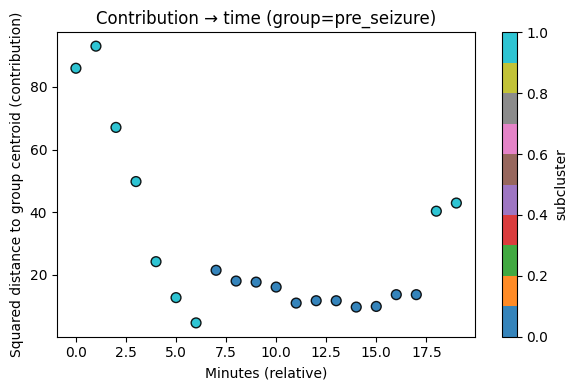

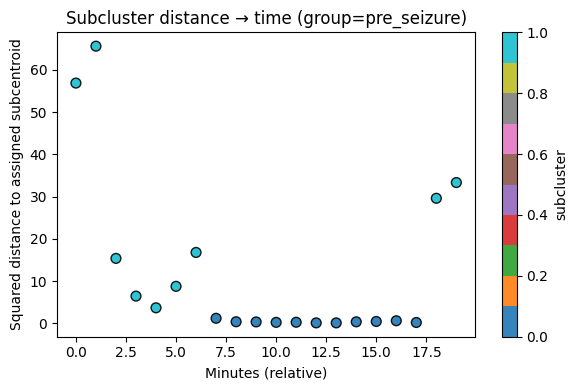


K-sweep (within/total ratio and silhouette):
   sum_within_var  total_var     ratio  silhouette
k                                                 
2       26.636058  28.792024  0.925119    0.619884
3       16.952414  28.792024  0.588789    0.699156
4        6.020250  28.792024  0.209094    0.759983
5        4.000764  28.792024  0.138954    0.779295
6        2.622917  28.792024  0.091099    0.724582


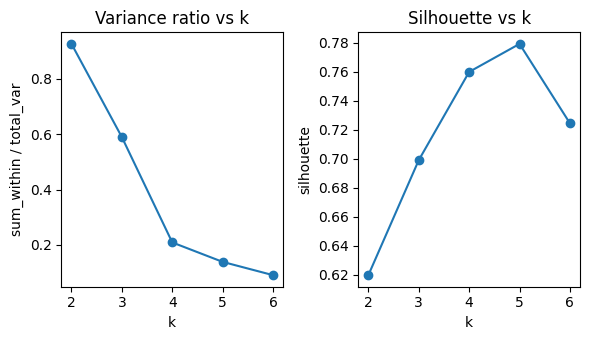

In [16]:
res_details, sweep = map_variability_to_time(giorgio, group_name='pre_seizure',
                                             use_pca=True, n_components=2, k=2,
                                             time_unit_minutes=1.0, top_n=10)

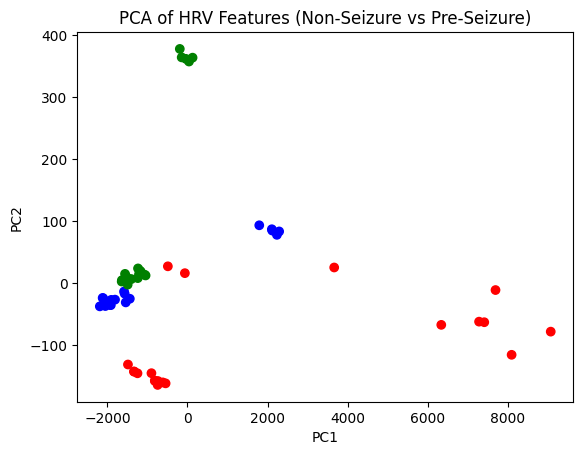

In [15]:
pca = PCA(n_components=2)
components = pca.fit_transform(X)

plt.scatter(components[:, 0], components[:, 1], c=giorgio['group'].map({'first_non_seizure': 'blue', 'second_non_seizure': 'green', 'pre_seizure': 'red', }))
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA of HRV Features (Non-Seizure vs Pre-Seizure)")
plt.show()

#### Per-group Hopkins clusterability test

Using features from df

In [18]:
def hopkins_per_group(df, feature_cols=None, sampling_pct=0.1, min_m=10, max_m=100):
    """
    Compute Hopkins statistic per group.
      - df: DataFrame containing 'group' and feature columns
      - feature_cols: list of columns to use; if None, uses all except 'group' and 'window_center_s'
      - sampling_pct: fraction of samples to use for m (default 0.1)
      - min_m / max_m: min and max allowed sampling size
    Returns DataFrame with group, n_samples, m_used, hopkins.
    """
    out = []
    if feature_cols is None:
        feature_cols = [c for c in df.columns if c not in ('group', 'window_center_s')]
    for grp, g in df.groupby('group'):
        X = g[feature_cols].values
        n = X.shape[0]
        if n < min_m:
            out.append({'group': grp, 'n': n, 'm': np.nan, 'hopkins': np.nan, 'note': 'too few samples'})
            continue
        m = int(max(min_m, round(sampling_pct * n)))
        m = min(m, max_m, n-1)
        Xs = StandardScaler().fit_transform(X)
        h = hopkins(Xs, m)
        out.append({'group': grp, 'n': n, 'm': m, 'hopkins': float(h), 'note': ''})
    return pd.DataFrame(out).set_index('group')

In [19]:
# Choose feature columns explicitly if needed, e.g. feature_cols = [c for c in permanova_dataset.columns if c not in ['group','window_center_s']]
feature_cols = None
hopkins_results = hopkins_per_group(giorgio, feature_cols=feature_cols, sampling_pct=0.1, min_m=10, max_m=100)
print(hopkins_results)

                     n   m   hopkins note
group                                    
first_non_seizure   20  10  0.167256     
pre_seizure         20  10  0.187416     
second_non_seizure  20  10  0.291417     


In [20]:
# Simple interpretation
for grp, row in hopkins_results.iterrows():
    h = row['hopkins']
    if pd.isna(h):
        note = "insufficient samples"
    elif h > 0.75:
        note = "strong cluster tendency"
    elif h > 0.6:
        note = "moderate cluster tendency"
    elif h > 0.5:
        note = "weak cluster tendency"
    else:
        note = "no cluster tendency (random)"
    print(f"{grp}: n={int(row['n'])}, m={row['m']}, hopkins={row['hopkins']:.3f} → {note}")

first_non_seizure: n=20, m=10, hopkins=0.167 → no cluster tendency (random)
pre_seizure: n=20, m=10, hopkins=0.187 → no cluster tendency (random)
second_non_seizure: n=20, m=10, hopkins=0.291 → no cluster tendency (random)


Using features from PCA

In [21]:
def hopkins_per_group(df, feature_cols=None, sampling_pct=0.1, min_m=10, max_m=100,
                      use_pca=False, n_components=2, variance_threshold=None):
    """
    Compute Hopkins per group. If use_pca=True, PCA is fit on the full feature set (scaled)
    and group Hopkins is computed on the PC scores (consistent projection).
    - variance_threshold: if set, choose smallest n_components to reach it (0-1).
    """
    out = []
    if feature_cols is None:
        feature_cols = [c for c in df.columns if c not in ('group', 'window_center_s')]
    # scale full matrix
    X_all = df[feature_cols].values
    scaler = StandardScaler().fit(X_all)
    X_scaled_all = scaler.transform(X_all)

    # optional PCA projection (fit on full dataset for consistent mapping)
    if use_pca:
        pca = PCA(n_components=min(n_components, X_scaled_all.shape[1]))
        X_pca = pca.fit_transform(X_scaled_all)
        if variance_threshold is not None:
            cumvar = np.cumsum(pca.explained_variance_ratio_)
            k = int(np.searchsorted(cumvar, variance_threshold) + 1)
            k = min(k, X_pca.shape[1])
            # refit to exact k
            pca = PCA(n_components=k).fit(X_scaled_all)
            X_pca = pca.transform(X_scaled_all)
        score_df = pd.DataFrame(X_pca, index=df.index, columns=[f"PC{i+1}" for i in range(X_pca.shape[1])])
    else:
        # use scaled features directly
        score_df = pd.DataFrame(X_scaled_all, index=df.index, columns=feature_cols)

    for grp, g in df.groupby('group'):
        X = score_df.loc[g.index].values
        n = X.shape[0]
        if n < min_m:
            out.append({'group': grp, 'n': n, 'm': np.nan, 'hopkins': np.nan, 'note': 'too few samples'})
            continue
        m = int(max(min_m, round(sampling_pct * n)))
        m = min(m, max_m, n-1)
        # Hopkins expects raw data (no further scaling required if we already scaled)
        h = hopkins(X, m)
        out.append({'group': grp, 'n': n, 'm': m, 'hopkins': float(h), 'note': ''})
    return pd.DataFrame(out).set_index('group')

In [22]:
hopkins_results_pca = hopkins_per_group(giorgio, use_pca=True, n_components=3, sampling_pct=0.1)
print(hopkins_results_pca)

                     n   m   hopkins note
group                                    
first_non_seizure   20  10  0.098062     
pre_seizure         20  10  0.144099     
second_non_seizure  20  10  0.229372     


#### Running PERMANOVA on different sets of features for domain-specific analysis

In [39]:
# Time-domain subset
time_features = ["tm_nni_counter", "tm_nni_mean", "tm_nni_min", "tm_nni_max", "tm_hr_mean", "tm_hr_min", "tm_hr_max", "tm_hr_std", "tm_nni_diff_mean", "tm_nni_diff_min", "tm_nni_diff_max", "tm_sdnn", "tm_sdnn_index", "tm_sdann", "tm_rmssd", "tm_sdsd", "tm_nn50", "tm_pnn50", "tm_nn20", "tm_pnn20", "tm_nni_histogram", "tm_tinn_n", "tm_tinn_m", "tm_tinn", "tm_tri_index"]

# Frequency LF+HF subset
lf_hf_features = ["ft_lf_abs", "ft_lf_rel", "ft_lf_peak", "ft_hf_abs", "ft_hf_rel", "ft_hf_peak", "ft_lf_hf_ratio", "ft_fft_rel_lf", "ft_fft_rel_hf", "ft_total_power"]

# Frequency VLF subset
vlf_features = ["ft_vlf_abs", "ft_vlf_rel", "ft_vlf_peak", "ft_total_power"]

# Nonlinear subset
nonlinear_features = ["nl_sd1", "nl_sd2", "nl_sd1_sd2_ratio", "nl_ellipse_area", "nl_sampen", "nl_dfa_alpha1", "nl_dfa_alpha2", "nl_dfa_alpha1_beats", "nl_dfa_alpha2_beats"]

In [ ]:
# Adjust!!
for subset_name, subset_features in {
    "Time": time_features,
    "Frequency LF+HF": lf_hf_features,
    "Frequency VLF": vlf_features,
    "Nonlinear": nonlinear_features
}.items():
    X_sub = giorgio[subset_features]
    X_scaled = StandardScaler().fit_transform(X_sub)
    dist_matrix = squareform(pdist(X_scaled, metric="euclidean"))  # choose distance with most significant result globally
    dm = DistanceMatrix(dist_matrix, ids=giorgio.index.astype(str))
    res = permanova(dm, giorgio["group"], permutations=999)
    print(subset_name, "→ p =", res['p-value'])